In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Surveys_Superview.csv')
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


# Where should Make School invest money?
## Lets break this question down a little bit.
###    Which tracks should Make School focus on?
####        1. Which Tracks have the most responses?
####        2. Which tracks have the highest net promotion on average?
####        3. How does the nps change over the course of each track?
###    Which locations should Make School focus on?
####        1. Where does Make School get the most responces from?
####        2. What is the quaility of NPS from those locations?
####        3. How does the nps change over the term by location?
###    What does the cross section of good tracks and good locations look like?

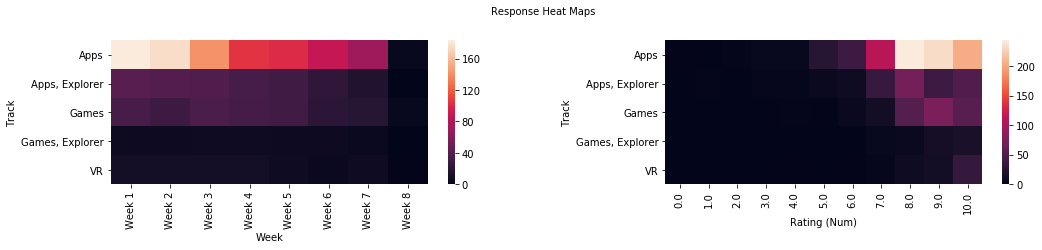

In [2]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(pd.crosstab(df.Track, df.Week), ax=axs[0])
sns.heatmap(pd.crosstab(df.Track.dropna(), pd.to_numeric(df['Rating (Num)'].dropna(), errors='coerce')),ax=axs[1])
fig.text(1, 0.6, 'Response Heat Maps', ha='center', va='center')
plt.subplots_adjust(left=0, bottom=0, right=2.2, top=0.5, wspace=0.4, hspace=0.1)

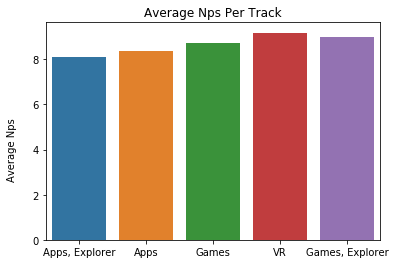

In [3]:
track_ave = []
for track in df['Track'].dropna().unique():
    sum_of_track = 0
    for i in df[df['Track'] == track]['Rating (Num)'].dropna():
        sum_of_track += int(i)
    track_ave.append(float(sum_of_track)/len(df[df['Track'] == track]['Rating (Num)'].dropna()))
chart = sns.barplot(y=track_ave, x=df['Track'].dropna().unique())
chart.title.set_text('Average Nps Per Track')
chart.text(-1, 4, 'Average Nps', ha='center', va='center', rotation='vertical')
plt.show()

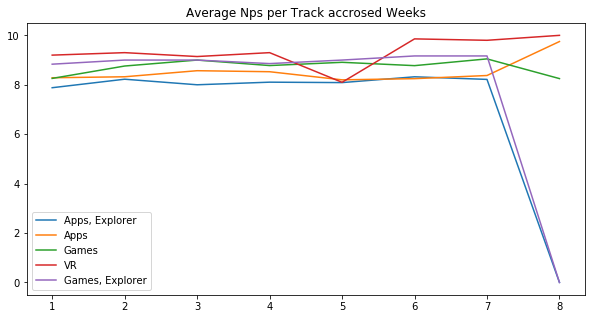

In [4]:
g = plt.figure(figsize=(10,5))
track_ave_week = []
concat_names = []
for track in df['Track'].dropna().unique():
    track_ave_week = []
    concat_names = [i for i in range(1,9)]
    for week in df['Week'].dropna().unique():
        sum_of_track = 0
        for i in df[(df['Track'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna():
            sum_of_track += int(i)
        if len(df[(df['Track'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna()) != 0:
            track_ave_week.append(float(sum_of_track)/len(df[(df['Track'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna()))
        else:
            track_ave_week.append(0)
    sns.lineplot(y=track_ave_week, x=concat_names, label=track).title.set_text('Average Nps per Track accrosed Weeks')
#plt.show()

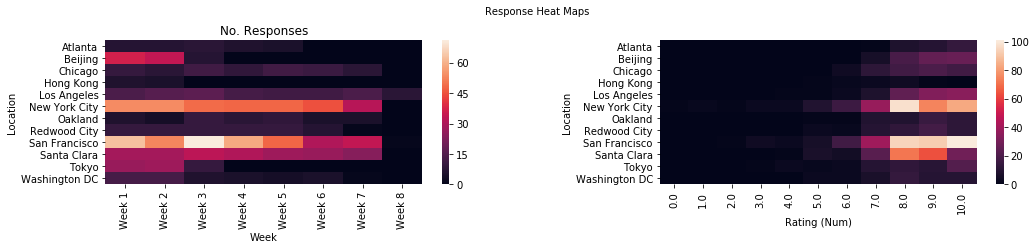

In [5]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(pd.crosstab(df.Location, df.Week), ax=axs[0]).title.set_text('No. Responses')
sns.heatmap(pd.crosstab(df.Location.dropna(), pd.to_numeric(df['Rating (Num)'].dropna(), errors='coerce')),ax=axs[1])
fig.text(1, 0.6, 'Response Heat Maps', ha='center', va='center')
plt.subplots_adjust(left=0, bottom=0, right=2.2, top=0.5, wspace=0.4, hspace=0.1)

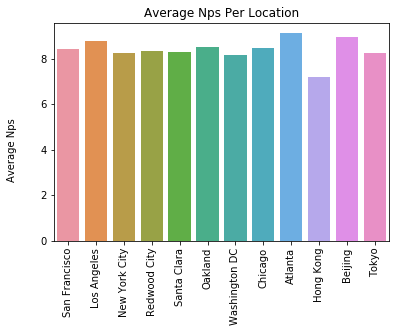

In [6]:
track_ave = []
for track in df['Location'].dropna().unique():
    sum_of_track = 0
    for i in df[df['Location'] == track]['Rating (Num)'].dropna():
        sum_of_track += int(i)
    track_ave.append(float(sum_of_track)/len(df[df['Location'] == track]['Rating (Num)'].dropna()))
chart = sns.barplot(y=track_ave, x=df['Location'].dropna().unique())
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.text(-2, 4, 'Average Nps', ha='center', va='center', rotation='vertical')
chart.title.set_text('Average Nps Per Location')
plt.show()

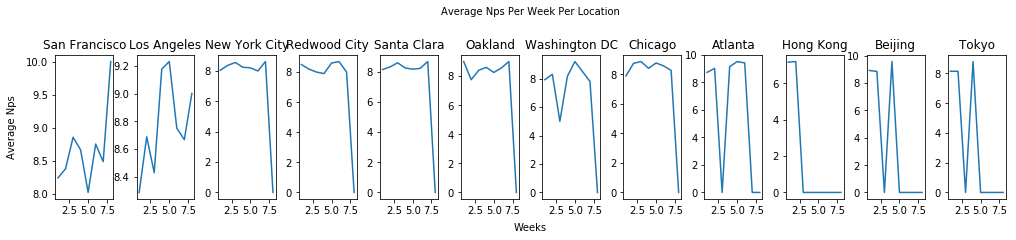

In [7]:
fig, axs = plt.subplots(ncols=12)
track_ave_week = []
concat_names = []
count = 0
for track in df['Location'].dropna().unique():
    track_ave_week = []
    concat_names = [i for i in range(1,9)]
    for week in df['Week'].dropna().unique():
        sum_of_track = 0
        for i in df[(df['Location'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna():
            sum_of_track += int(i)
        if len(df[(df['Location'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna()) != 0:
            track_ave_week.append(float(sum_of_track)/len(df[(df['Location'] == track) & (df['Week'] == week)]['Rating (Num)'].dropna()))
        else:
            track_ave_week.append(0)
    sns.lineplot(y=track_ave_week, x=concat_names, ax=axs[count])
    axs[count].title.set_text(track)
    count += 1
plt.subplots_adjust(left=0, bottom=0, right=2.2, top=0.5, wspace=0.4, hspace=0.1)
fig.text(1.1, -0.1, 'Weeks', ha='center', va='center')
fig.text(-0.1, 0.25, 'Average Nps', ha='center', va='center', rotation='vertical')
fig.text(1.1, 0.65, 'Average Nps Per Week Per Location', ha='center', va='center')
plt.show()

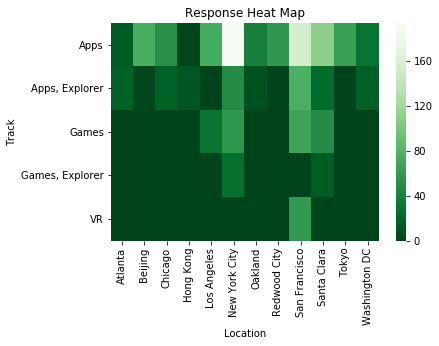

In [8]:
hmap = sns.heatmap(pd.crosstab(df.Track, df.Location), cmap="Greens_r" )
hmap.title.set_text('Response Heat Map')
plt.show()

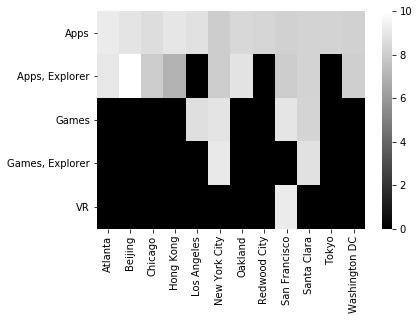

In [9]:
# fig, axs = plt.subplots(ncols=12)
track_ave_week = []
concat_names = []
count = 0
for track in np.sort(df['Track'].dropna().unique()):
    track_ave_loca = []
    # concat_names = [i for i in range(1,9)]
    for loca in np.sort(df['Location'].dropna().unique()):
        sum_of_track = 0
        for i in df[(df['Track'] == track) & (df['Location'] == loca)]['Rating (Num)'].dropna():
            sum_of_track += int(i)
        if len(df[(df['Track'] == track) & (df['Location'] == loca)]['Rating (Num)'].dropna()) != 0:
            track_ave_loca.append(float(sum_of_track)/len(df[(df['Track'] == track) & (df['Location'] == loca)]['Rating (Num)'].dropna()))
        else:
            track_ave_loca.append(0)
    track_ave_week.append(track_ave_loca)
    #sns.lineplot(y=track_ave_week, x=concat_names, ax=axs[count])
    #axs[count].title.set_text(track)
    #count += 1
#plt.subplots_adjust(left=0, bottom=0, right=2.2, top=0.5, wspace=0.4, hspace=0.1)
#fig.text(1.1, -0.1, 'Weeks', ha='center', va='center')
#fig.text(-0.1, 0.25, 'Average Nps', ha='center', va='center', rotation='vertical')
#fig.text(1.1, 0.65, 'Average Nps Per Week Per Location', ha='center', va='center')
track_ave_week = np.array(track_ave_week)
c = pd.DataFrame(data=track_ave_week[0:,0:], index=np.sort(df['Track'].dropna().unique()), columns=np.sort(df['Location'].dropna().unique()))

c
sns.heatmap(c, cmap="gray")

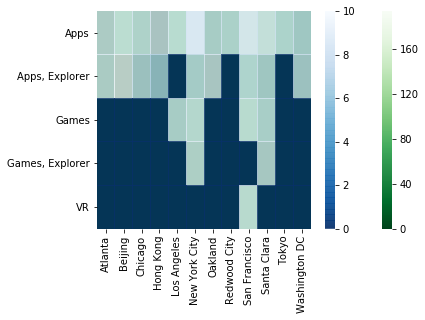

In [10]:
r = pd.crosstab(df.Track, df.Location)
#sns.heatmap(r, alpha=0.75)
sns.heatmap(r, alpha=1, cmap="Greens_r")
sns.heatmap(c, alpha=0.75, cmap="Blues_r")
